In [2]:
from sklearn.linear_model import SGDRegressor

from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt 

In [6]:
x, y = make_regression(n_samples=1000, n_features=30)
#x con 30 filas

In [7]:
print("x antes")
print(x)

x antes
[[ 0.12599806 -0.51414566 -0.09661593 ...  1.41971505 -0.01957164
   0.76433154]
 [ 1.25177754 -0.76785111 -0.00532646 ...  1.03922419  0.90349336
  -1.4226003 ]
 [ 1.78009799 -0.2480783   1.01635849 ...  0.08648192  0.75316922
   1.211066  ]
 ...
 [ 0.57770789 -1.61491086  0.29988384 ...  1.62430196 -0.68204985
  -0.95778454]
 [ 0.75806009 -0.75869624  1.39830199 ...  0.69869371  1.6943766
   0.37911232]
 [ 1.93636861 -0.10618595 -0.80807557 ... -1.0738634  -0.17588787
   2.0048038 ]]


In [8]:
x = scale(x)
y = scale(y)
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.15)

In [9]:
print("x despues")
print(x)

x despues
[[ 0.0987861  -0.47342263 -0.03933975 ...  1.49889082  0.01456484
   0.73833664]
 [ 1.23270031 -0.72629634  0.05010374 ...  1.09406238  0.94227286
  -1.42725895]
 [ 1.76483833 -0.20822754  1.05112902 ...  0.08037925  0.79119258
   1.18071264]
 ...
 [ 0.55375992 -1.57057911  0.34914232 ...  1.71656385 -0.65124564
  -0.96697804]
 [ 0.73541532 -0.71717148  1.42534917 ...  0.73175033  1.73713424
   0.35687571]
 [ 1.92223814 -0.06680037 -0.73641285 ... -1.15418598 -0.14253767
   1.96670653]]


In [10]:
sgdr = SGDRegressor()
print(sgdr)

SGDRegressor()


In [11]:
sgdr.fit(xtrain, ytrain)

score = sgdr.score(xtrain, ytrain)
print("R-squared:", score)

R-squared: 0.999999965720806


In [12]:
cv_score = cross_val_score(sgdr, x, y, cv = 10)
print("CV mean score: ", cv_score.mean())

CV mean score:  0.9999999547312942


In [13]:
ypred = sgdr.predict(xtest)

mse = mean_squared_error(ytest, ypred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 

MSE:  3.783114256358067e-08
RMSE:  0.00019450229449438552


In [16]:
import pandas as pd
from pandas import read_csv
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [19]:
y=data["MEDV"]


0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64


In [22]:
x=data.drop(columns=["MEDV"])


        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX   
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0  \
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [23]:
x = scale(x)
y = scale(y)


In [25]:
print(x)

[[-0.41978194  0.28482986 -1.2879095  ... -1.45900038  0.44105193
  -1.0755623 ]
 [-0.41733926 -0.48772236 -0.59338101 ... -0.30309415  0.44105193
  -0.49243937]
 [-0.41734159 -0.48772236 -0.59338101 ... -0.30309415  0.39642699
  -1.2087274 ]
 ...
 [-0.41344658 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.98304761]
 [-0.40776407 -0.48772236  0.11573841 ...  1.17646583  0.4032249
  -0.86530163]
 [-0.41500016 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.66905833]]


In [24]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.15)

In [26]:
sgdr = SGDRegressor(alpha=0.0001, epsilon=0.01, eta0=0.1,penalty='elasticnet')

In [27]:
sgdr.fit(xtrain, ytrain)

SGDRegressor(epsilon=0.01, eta0=0.1, penalty='elasticnet')

In [28]:
score = sgdr.score(xtrain, ytrain)
print("R-squared:", score)

R-squared: 0.7621072343685988


In [29]:
ypred = sgdr.predict(xtest)

In [30]:
mse = mean_squared_error(ytest, ypred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))

MSE:  0.5202563912553473
RMSE:  0.7212880085342798


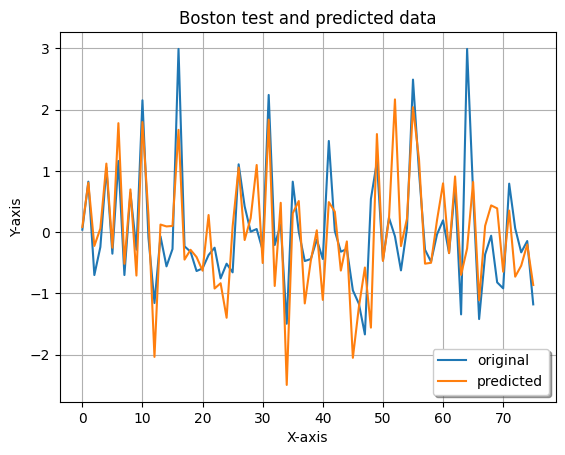

In [31]:
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("Boston test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()